# K Means Clustering  


Neste projeto tentaremos usar o KMeans Clustering para agrupar Universidades em dois grupos: Privadas e Públicas.


___
É muito importante observar, no dataset temos os rótulos para este conjunto de dados, mas NÃO os usaremos para o algoritmo de agrupamento KMeans, pois esse é um algoritmo de aprendizado não supervisionado. **

___

## Os dados

Dicionário de dados:
* Private: Um fator com níveis Não e Sim, indicando universidade privada ou pública.
* Apps: Número de inscrições recebidas.
* Accept: Quantidade de inscrições aceitas.
* Enroll: Número de estudantes matriculados.
* Top10perc: Percentual de novos estudantes vindo do grupo de 10% melhores do segundo grau.
* Top25perc: Percentual de novos estudantes vindo do grupo de 25% melhores do segundo grau.
* F.Undergrad: Número de alunos de graduação em tempo integral.
* P.Undergrad Número de alunos de graduação em tempo parcial.
* Outstate: Aulas fora do estado.
* Room.Board: Custos da sala.
* Books: Custos de livros estimados.
* Personal: Estimativa de gastos por pessoa.
* PhD: Percentual de PHD's na universidade.
* Terminal: Percentual da faculdade com graduação.
* S.F.Ratio: Taxa estudantes/faculdade.
* perc.alumni: Percentual dos ex-alunos que doam.
* Expend: Despesas da instituição por aluno.
* Grad.Rate: Taxa de graduação

## Importar bibliotecas

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Obtenha os dados

In [70]:
df = pd.read_csv('College_Data', index_col=0)

In [71]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [73]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Análise exploratória de dados

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

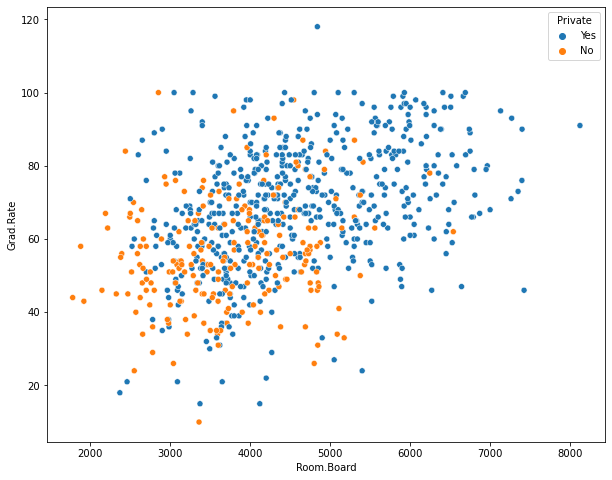

In [74]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private')

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

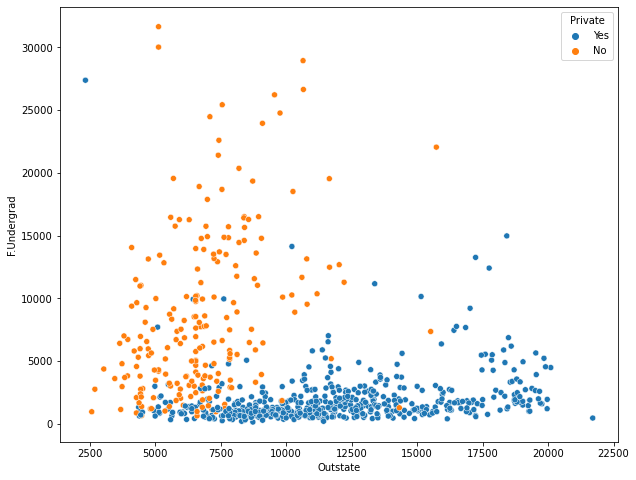

In [75]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Outstate', y='F.Undergrad', data=df, hue='Private')

<AxesSubplot:xlabel='Outstate', ylabel='Count'>

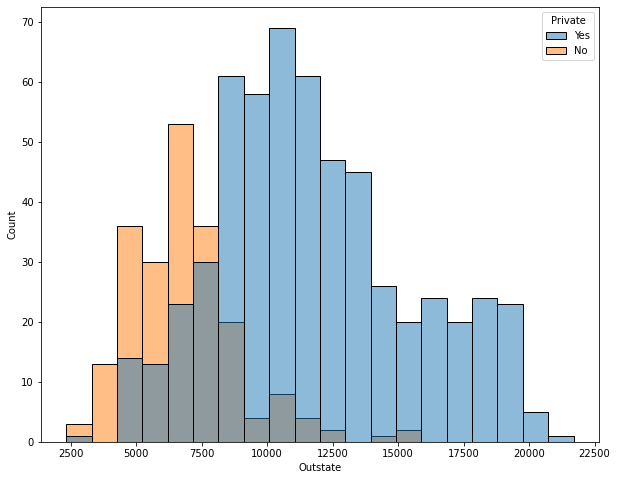

In [76]:
plt.figure(figsize=(10,8))
sns.histplot(x='Outstate',data=df, bins=20, hue='Private')

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

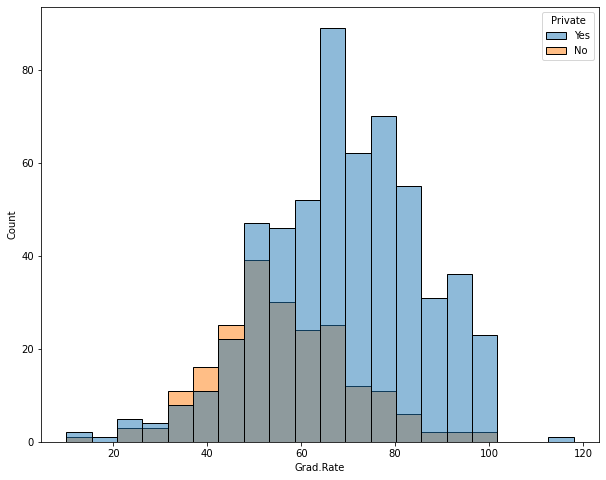

In [77]:
plt.figure(figsize=(10,8))
sns.histplot(x='Grad.Rate',data=df, bins=20, hue='Private')

obs: há uma alguma escola privada com taxa de graduação acima de 100%

In [78]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [84]:
#A Universidade é a Cazenovia College vamos adicionar a taxa de graduação dela como 100
df['Grad.Rate']['Cazenovia College'] = 100

<AxesSubplot:xlabel='Grad.Rate', ylabel='Count'>

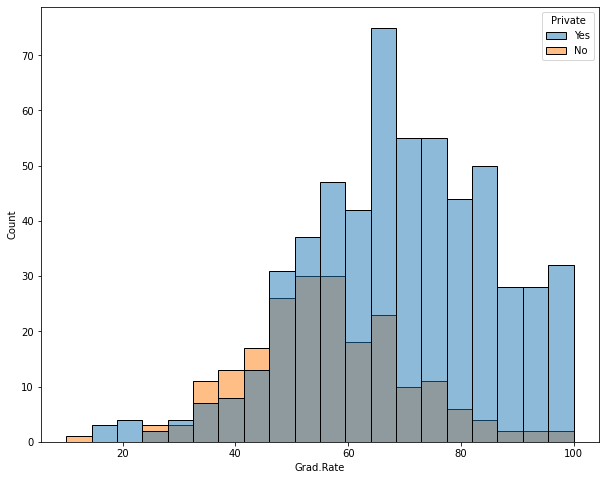

In [82]:
plt.figure(figsize=(10,8))
sns.histplot(x='Grad.Rate',data=df, bins=20, hue='Private')

Conclusões:
    Universidades privadas tem taxa de graduação maior
    Universidades privadas tem o custo maior
    Universidades privadas tem mais aulas fora do estado
    Universidades públicas tem mais alunos em tempo integral

## Criação de clusters "K Means"

Agora é hora de criar os rótulos de Cluster!

In [85]:
from sklearn.cluster import KMeans

In [88]:
kmeans = KMeans(n_clusters=2)

In [89]:
kmeans.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

## Avaliação

Não há uma maneira perfeita de avaliar o agrupamento se você não tiver os rótulos, no entanto, como isso é apenas um exercício, temos os rótulos então aproveitamos isso para avaliar nossos clusters.

In [90]:
df['Clusters'] = df['Private'].map({'Yes' : 1, 'No' : 0})

In [96]:
df.sample(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Clusters
Trenton State College,No,5042,2312,944,55,94,5167,902,5391,5411,700,1000,81,87,14.4,6,8504,81,0
SUNY College at Potsdam,No,3150,2289,650,16,51,3598,234,6840,4660,500,1000,71,75,15.1,17,6436,59,0
Oklahoma Baptist University,Yes,758,681,484,35,59,1707,705,5390,3140,515,1290,63,71,15.1,18,5511,50,1
Rensselaer Polytechnic Institute,Yes,4996,4165,936,53,82,4291,16,17475,5976,1230,1100,94,98,15.4,21,15605,70,1
Muskingum College,Yes,1109,922,375,24,46,1115,70,13240,3914,600,800,73,85,13.4,27,9333,73,1


In [97]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Clusters'],kmeans.labels_))
print(classification_report(df['Clusters'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Não tão ruim, considerando que o algoritmo está usando apenas os recursos para agrupar as universidades em 2 grupos distintos.